Two figures for scGM, one figure for scRNA.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import imageio
import jax.numpy as jnp
from matplotlib import pyplot as plt
import struct
import pickle
import numpy as np

In [3]:
from tensorflow.python.summary.summary_iterator import summary_iterator

/Users/othmanesebbouh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Matrix visualization for scGM

In [4]:
src_dir = "pre_computed_runs/scGM/"
runs = ["scGM_l1_reg_0/",
        "scGM_l12_reg_7.5/",
        "scGM_l1_reg_1.5/",
        "scGM_run_l1_reg_2/"
       ]

Ms = []
for run in runs:
    M_loc = src_dir + run + "params/M/M_100.pkl"
    with open(M_loc, 'rb') as f:
        M = pickle.load(f)
    Ms.append(M)

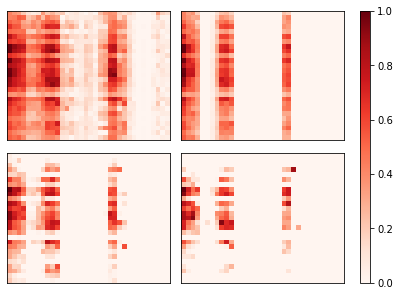

In [5]:
#fig, axes = plt.subplots(nrows=2, ncols=2)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
ax[0, 0].matshow(np.abs(Ms[0]), cmap="Reds")
ax[0, 0].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False, top=False, labeltop=False)
ax[0, 1].matshow(np.abs(Ms[1]), cmap="Reds")
ax[0, 1].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False, top=False, labeltop=False)

ax[1, 0].matshow(np.abs(Ms[2]), cmap="Reds")
ax[1, 0].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False, top=False, labeltop=False)

ax[1, 1].matshow(np.abs(Ms[3]), cmap="Reds")
im = ax[1, 1].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False, top=False, labeltop=False)

cax = fig.add_axes([ax[1,1].get_position().x1,#-0.25, 
                    ax[1,1].get_position().y0,
                    0.02,
                    ax[0, 1].get_position().y1-ax[1, 1].get_position().y0])
fig.subplots_adjust(wspace=-0.2, hspace=0.1)
fig.colorbar(im, cax=cax, cmap="Reds")

plt.savefig("plots/matrices.pdf", 
            bbox_inches='tight', pad_inches=0.02, dpi=200, facecolor='white')

# Get proportion of zeros

In [6]:
src_dir = "pre_computed_runs/scGM/"
runs = ["scGM_l1_reg_0/events.out.tfevents.1696426560.scGM_l1_reg_0",
        "scGM_l12_reg_7.5/events.out.tfevents.1696428467.scGM_l12_reg_7.5",
        "scGM_l1_reg_1.5/events.out.tfevents.1696429748.scGM_l1_reg_1.5",
        "scGM_run_l1_reg_2/events.out.tfevents.1696430094.scGM_run_l1_reg_2"
       ]
pzs = []
for run in runs:
    for e in summary_iterator(src_dir + run):    
        for v in e.summary.value:
            if v.tag == 'nz':
                pz = v.simple_value
    pzs.append(pz)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [7]:
for pz in pzs:
    print(pz)

5.882352828979492
67.64705657958984
71.35076904296875
84.20479583740234
